In [1]:
import numpy as np
import pandas as pd
import pickle
from sklearn.neighbors import KNeighborsClassifier
import cmath 
import numpy as geek
import cmath, math, numpy

import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')

In [2]:
file = open("TrainData.pkl", 'rb')
Xd = pickle.load(file, encoding = 'bytes')
snrs, mods = map(lambda j: sorted(list(set(map(lambda x: x[j], Xd.keys())))), [1, 0])
X = [] 
lbl = []
for mod in mods:
    for snr in snrs:
        X.append(Xd[(mod, snr)])
        for i in range(Xd[(mod, snr)].shape[0]):  lbl.append((mod))#lbl.append((mod, snr))
X = np.vstack(X)
file.close()

In [3]:
features        = {}
features['raw'] = X[:, 0], X[:, 1]

In [4]:
Data = []

for i in range(len(lbl)):
    Data.append([lbl[i], X[i]])

In [5]:
df = pd.DataFrame(Data, columns=["lbl", "IQs"])
#df["lbl"][0]#change iqs or lbl to detect the label or array

In [6]:
x=Data[20000:140000]
y=Data[180000:220000]
z=x+y

In [7]:
a=lbl[20000:140000]
n=lbl[180000:220000]
s=(a+n)

In [8]:
Mean1 = []
Std1 = []
Max1 = []
Min1 = []
Median1 = []
Var1 = []
Abs1 = []
Amp1=[]


Mean2 = []
Std2 = []
Max2 = []
Min2 = []
Median2 = []
Var2 = []
Abs2 = []
Amp2=[]

for idx in range(len(z)):

    [_, [r, i]] = z[idx]
    r1= r[0:64]
    i1=i[0:64]
    phi=np.arctan(i1//r1) #phi = tan inverse (imaginary / real)
    amp=np.abs(r1 + 1j*i1)

    Mean1.append(np.mean(phi))
    Max1.append(np.max(phi))
    Min1.append(np.min(phi))
    Std1.append(np.std(phi))
    Median1.append(np.median(phi))
    Var1.append(np.var(phi))
    Abs1.append(np.mean(np.abs(phi)))
    
    Mean2.append(np.mean(amp))
    Max2.append(np.max(amp))
    Min2.append(np.min(amp))
    Std2.append(np.std(amp))
    Median2.append(np.median(amp))
    Var2.append(np.var(amp))
    Abs2.append(np.mean(np.abs(amp)))
      

In [9]:
len(phi),len(amp)

(64, 64)

In [10]:
len(Mean1)

160000

In [11]:
Features = np.c_[Mean1, Std1, Max1, Min1, Median1, Var1, Abs1,Mean2, Std2, Max2, Min2, Median2, Var2, Abs2,]

In [12]:
len(Features)

160000

In [13]:
SNR1= Features[0:1000]
SNR2=Features[20000:21000]
SNR3=Features[40000:41000]
SNR4=Features[60000:61000]
SNR5=Features[80000:81000]
SNR6=Features[100000:101000]
SNR7=Features[120000:121000]
SNR8=Features[140000:141000]
#SNR9=Features[160000:161000]
#SNR10=Features[180000:181000]
#SNR11=Features[200000:201000]
SNR=np.concatenate((SNR1,SNR2,SNR3,SNR4,SNR5,SNR6,SNR7,SNR8),axis=0)

In [14]:
lbl1= s[0:1000]
lbl2=s[20000:21000]
lbl3=s[40000:41000]
lbl4=s[60000:61000]
lbl5=s[80000:81000]
lbl6=s[100000:101000]
lbl7=s[120000:121000]
lbl8=s[140000:141000]
#lbl9=lbl[160000:161000]
#lbl10=lbl[180000:181000]
#lbl11=lbl[200000:201000]
lbl=np.concatenate((lbl1,lbl2,lbl3,lbl4,lbl5,lbl6,lbl7,lbl8),axis=0)

In [15]:
from sklearn.model_selection import train_test_split

#split dataset into train and test data
X_train, X_test, y_train, y_test = train_test_split(SNR, lbl, test_size=0.1, random_state=1, stratify=lbl)

In [16]:
# Import svm model
from sklearn import svm
from sklearn.model_selection import GridSearchCV
parameters = {'kernel':('poly', 'rbf'), 'C':[1, 100]}
svc = svm.SVC()
clf = GridSearchCV(svc, parameters)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

In [17]:
#check top performing n_neighbors value
clf.best_params_

{'C': 100, 'kernel': 'poly'}

In [18]:
#Get accuracy. Note: In case of classification algorithms score method represents accuracy.
score = clf.score(X_test, y_test)

In [19]:
score

0.1275

In [20]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

# Model Accuracy: how often is the classifier correct?
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.1275


In [21]:
# Model Precision: what percentage of positive tuples are labeled as such?
print("Precision:", metrics.precision_score(y_test, y_pred, pos_label='positive',average='macro')) 
           

# Model Recall: what percentage of positive tuples are labelled as such?
print("Recall:", metrics.recall_score(y_test, y_pred,pos_label='positive',average='macro'))

Precision: 0.10669722195964115
Recall: 0.1275


C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1267: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'macro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn("Note that pos_label (set to %r) is ignored when "
C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [22]:
SNR1= Features[1000:2000]
SNR2=Features[21000:22000]
SNR3=Features[41000:42000]
SNR4=Features[61000:62000]
SNR5=Features[81000:82000]
SNR6=Features[101000:102000]
SNR7=Features[121000:122000]
SNR8=Features[141000:142000]
#SNR9=Features[161000:162000]
#SNR10=Features[181000:182000]
#SNR11=Features[201000:202000]
SNR=np.concatenate((SNR1,SNR2,SNR3,SNR4,SNR5,SNR6,SNR7,SNR8),axis=0)

In [23]:
lbl1= s[1000:2000]
lbl2=s[21000:22000]
lbl3=s[41000:42000]
lbl4=s[61000:62000]
lbl5=s[81000:82000]
lbl6=s[101000:102000]
lbl7=s[121000:122000]
lbl8=s[141000:142000]
#lbl9=s[161000:162000]
#lbl10=s[181000:182000]
#lbl11=s[201000:202000]
lbl=np.concatenate((lbl1,lbl2,lbl3,lbl4,lbl5,lbl6,lbl7,lbl8),axis=0)

In [24]:
from sklearn.model_selection import train_test_split

#split dataset into train and test data
X_train, X_test, y_train, y_test = train_test_split(SNR, lbl, test_size=0.1, random_state=1, stratify=lbl)

In [25]:
# Import svm model
from sklearn import svm
from sklearn.model_selection import GridSearchCV
parameters = {'kernel':('poly', 'rbf'), 'C':[1, 100]}
svc = svm.SVC()
clf = GridSearchCV(svc, parameters)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

In [26]:
#check top performing n_neighbors value
clf.best_params_

{'C': 1, 'kernel': 'rbf'}

In [27]:
#Get accuracy. Note: In case of classification algorithms score method represents accuracy.
score = clf.score(X_test, y_test)

In [28]:
score 

0.12375

In [29]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

# Model Accuracy: how often is the classifier correct?
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.12375


In [30]:
# Model Precision: what percentage of positive tuples are labeled as such?
print("Precision:", metrics.precision_score(y_test, y_pred, pos_label='positive',average='macro')) 
           

# Model Recall: what percentage of positive tuples are labelled as such?
print("Recall:", metrics.recall_score(y_test, y_pred,pos_label='positive',average='macro'))

Precision: 0.07686857245950038
Recall: 0.12375


C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1267: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'macro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn("Note that pos_label (set to %r) is ignored when "
C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [31]:
SNR1= Features[2000:3000]
SNR2=Features[22000:23000]
SNR3=Features[42000:43000]
SNR4=Features[62000:63000]
SNR5=Features[82000:83000]
SNR6=Features[102000:103000]
SNR7=Features[122000:123000]
SNR8=Features[142000:143000]
#SNR9=Features[162000:163000]
#SNR10=Features[182000:183000]
#SNR11=Features[202000:203000]
SNR=np.concatenate((SNR1,SNR2,SNR3,SNR4,SNR5,SNR6,SNR7,SNR8),axis=0)

In [32]:
lbl1= s[2000:3000]
lbl2=s[22000:23000]
lbl3=s[42000:43000]
lbl4=s[62000:63000]
lbl5=s[82000:83000]
lbl6=s[102000:103000]
lbl7=s[122000:123000]
lbl8=s[142000:143000]
#lbl9=lbl[162000:163000]
#lbl10=lbl[182000:183000]
#lbl11=lbl[202000:203000]
lbl=np.concatenate((lbl1,lbl2,lbl3,lbl4,lbl5,lbl6,lbl7,lbl8),axis=0)

In [33]:
from sklearn.model_selection import train_test_split

#split dataset into train and test data
X_train, X_test, y_train, y_test = train_test_split(SNR, lbl, test_size=0.1, random_state=1, stratify=lbl)

In [34]:
# Import svm model
from sklearn import svm
from sklearn.model_selection import GridSearchCV
parameters = {'kernel':('poly', 'rbf'), 'C':[1, 100]}
svc = svm.SVC()
clf = GridSearchCV(svc, parameters)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

In [35]:
#check top performing n_neighbors value
clf.best_params_

{'C': 100, 'kernel': 'rbf'}

In [36]:
#Get accuracy. Note: In case of classification algorithms score method represents accuracy.
score = clf.score(X_test, y_test)

In [37]:
score

0.11875

In [38]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

# Model Accuracy: how often is the classifier correct?
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.11875


In [39]:
# Model Precision: what percentage of positive tuples are labeled as such?
print("Precision:", metrics.precision_score(y_test, y_pred, pos_label='positive',average='macro')) 
           

# Model Recall: what percentage of positive tuples are labelled as such?
print("Recall:", metrics.recall_score(y_test, y_pred,pos_label='positive',average='macro'))

Precision: 0.11159411111311729
Recall: 0.11875000000000001


C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1267: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'macro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn("Note that pos_label (set to %r) is ignored when "


In [40]:
SNR1= Features[3000:4000]
SNR2=Features[23000:24000]
SNR3=Features[43000:44000]
SNR4=Features[63000:64000]
SNR5=Features[83000:84000]
SNR6=Features[103000:104000]
SNR7=Features[123000:124000]
SNR8=Features[143000:144000]
#SNR9=Features[163000:164000]
#SNR10=Features[183000:184000]
#SNR11=Features[203000:204000]
SNR=np.concatenate((SNR1,SNR2,SNR3,SNR4,SNR5,SNR6,SNR7,SNR8),axis=0)

In [41]:
lbl1= s[3000:4000]
lbl2=s[23000:24000]
lbl3=s[43000:44000]
lbl4=s[63000:64000]
lbl5=s[83000:84000]
lbl6=s[103000:104000]
lbl7=s[123000:124000]
lbl8=s[143000:144000]
#lbl9=lbl[163000:164000]
#lbl10=lbl[183000:184000]
#lbl11=lbl[203000:204000]
lbl=np.concatenate((lbl1,lbl2,lbl3,lbl4,lbl5,lbl6,lbl7,lbl8),axis=0)

In [42]:
from sklearn.model_selection import train_test_split

#split dataset into train and test data
X_train, X_test, y_train, y_test = train_test_split(SNR, lbl, test_size=0.1, random_state=1, stratify=lbl)

In [43]:
# Import svm model
from sklearn import svm
from sklearn.model_selection import GridSearchCV
parameters = {'kernel':('poly', 'rbf'), 'C':[1, 100]}
svc = svm.SVC()
clf = GridSearchCV(svc, parameters)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

In [44]:
#check top performing n_neighbors value
clf.best_params_

{'C': 100, 'kernel': 'poly'}

In [45]:
#Get accuracy. Note: In case of classification algorithms score method represents accuracy.
score = clf.score(X_test, y_test)

In [46]:
score

0.12375

In [47]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

# Model Accuracy: how often is the classifier correct?
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.12375


In [48]:
# Model Precision: what percentage of positive tuples are labeled as such?
print("Precision:", metrics.precision_score(y_test, y_pred, pos_label='positive',average='macro')) 
           

# Model Recall: what percentage of positive tuples are labelled as such?
print("Recall:", metrics.recall_score(y_test, y_pred,pos_label='positive',average='macro'))

Precision: 0.12059351496289278
Recall: 0.12375


C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1267: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'macro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn("Note that pos_label (set to %r) is ignored when "


In [49]:
SNR1= Features[4000:5000]
SNR2=Features[24000:25000]
SNR3=Features[44000:45000]
SNR4=Features[64000:65000]
SNR5=Features[84000:85000]
SNR6=Features[104000:105000]
SNR7=Features[124000:125000]
SNR8=Features[144000:145000]
#SNR9=Features[164000:165000]
#SNR10=Features[184000:185000]
#SNR11=Features[204000:205000]
SNR=np.concatenate((SNR1,SNR2,SNR3,SNR4,SNR5,SNR6,SNR7,SNR8),axis=0)

In [50]:
lbl1= s[4000:5000]
lbl2=s[24000:25000]
lbl3=s[44000:45000]
lbl4=s[64000:65000]
lbl5=s[84000:85000]
lbl6=s[104000:105000]
lbl7=s[124000:125000]
lbl8=s[144000:145000]
#lbl9=s[164000:165000]
#lbl10=s[184000:185000]
#lbl11=s[204000:205000]
lbl=np.concatenate((lbl1,lbl2,lbl3,lbl4,lbl5,lbl6,lbl7,lbl8),axis=0)

In [51]:
from sklearn.model_selection import train_test_split

#split dataset into train and test data
X_train, X_test, y_train, y_test = train_test_split(SNR, lbl, test_size=0.1, random_state=1, stratify=lbl)

In [52]:
# Import svm model
from sklearn import svm
from sklearn.model_selection import GridSearchCV
parameters = {'kernel':('poly', 'rbf'), 'C':[1, 100]}
svc = svm.SVC()
clf = GridSearchCV(svc, parameters)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

In [53]:
#check top performing n_neighbors value
clf.best_params_

{'C': 1, 'kernel': 'rbf'}

In [54]:
#Get accuracy. Note: In case of classification algorithms score method represents accuracy.
score = clf.score(X_test, y_test)

In [55]:
score

0.12875

In [56]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

# Model Accuracy: how often is the classifier correct?
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.12875


In [57]:
# Model Precision: what percentage of positive tuples are labeled as such?
print("Precision:", metrics.precision_score(y_test, y_pred, pos_label='positive',average='macro')) 
           

# Model Recall: what percentage of positive tuples are labelled as such?
print("Recall:", metrics.recall_score(y_test, y_pred,pos_label='positive',average='macro'))

Precision: 0.0892073639294739
Recall: 0.12875


C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1267: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'macro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn("Note that pos_label (set to %r) is ignored when "
C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [58]:
SNR1= Features[5000:6000]
SNR2=Features[25000:26000]
SNR3=Features[45000:46000]
SNR4=Features[65000:66000]
SNR5=Features[85000:86000]
SNR6=Features[105000:106000]
SNR7=Features[125000:126000]
SNR8=Features[145000:146000]
#SNR9=Features[165000:166000]
#SNR10=Features[185000:186000]
#SNR11=Features[205000:206000]
SNR=np.concatenate((SNR1,SNR2,SNR3,SNR4,SNR5,SNR6,SNR7,SNR8),axis=0)

In [59]:
lbl1= s[5000:6000]
lbl2=s[25000:26000]
lbl3=s[45000:46000]
lbl4=s[65000:66000]
lbl5=s[85000:86000]
lbl6=s[105000:106000]
lbl7=s[125000:126000]
lbl8=s[145000:146000]
#lbl9=lbl[165000:166000]
#lbl10=lbl[185000:186000]
#lbl11=lbl[205000:206000]
lbl=np.concatenate((lbl1,lbl2,lbl3,lbl4,lbl5,lbl6,lbl7,lbl8),axis=0)

In [60]:
from sklearn.model_selection import train_test_split

#split dataset into train and test data
X_train, X_test, y_train, y_test = train_test_split(SNR, lbl, test_size=0.1, random_state=1, stratify=lbl)

In [61]:
# Import svm model
from sklearn import svm
from sklearn.model_selection import GridSearchCV
parameters = {'kernel':('poly', 'rbf'), 'C':[1, 100]}
svc = svm.SVC()
clf = GridSearchCV(svc, parameters)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

In [62]:
#check top performing n_neighbors value
clf.best_params_

{'C': 100, 'kernel': 'poly'}

In [63]:
#Get accuracy. Note: In case of classification algorithms score method represents accuracy.
score = clf.score(X_test, y_test)

In [64]:
score

0.13375

In [65]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

# Model Accuracy: how often is the classifier correct?
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.13375


In [66]:
# Model Precision: what percentage of positive tuples are labeled as such?
print("Precision:", metrics.precision_score(y_test, y_pred, pos_label='positive',average='macro')) 
           

# Model Recall: what percentage of positive tuples are labelled as such?
print("Recall:", metrics.recall_score(y_test, y_pred,pos_label='positive',average='macro'))

Precision: 0.15654756220387683
Recall: 0.13374999999999998


C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1267: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'macro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn("Note that pos_label (set to %r) is ignored when "


In [67]:
SNR1= Features[6000:7000]
SNR2=Features[26000:27000]
SNR3=Features[46000:47000]
SNR4=Features[66000:67000]
SNR5=Features[86000:87000]
SNR6=Features[106000:107000]
SNR7=Features[126000:127000]
SNR8=Features[146000:147000]
#SNR9=Features[166000:167000]
#SNR10=Features[186000:187000]
#SNR11=Features[206000:207000]
SNR=np.concatenate((SNR1,SNR2,SNR3,SNR4,SNR5,SNR6,SNR7,SNR8),axis=0)

In [68]:
lbl1= s[6000:7000]
lbl2=s[26000:27000]
lbl3=s[46000:47000]
lbl4=s[66000:67000]
lbl5=s[86000:87000]
lbl6=s[106000:107000]
lbl7=s[126000:127000]
lbl8=s[146000:147000]
#lbl9=lbl[166000:167000]
#lbl10=lbl[186000:187000]
#lbl11=lbl[206000:207000]
lbl=np.concatenate((lbl1,lbl2,lbl3,lbl4,lbl5,lbl6,lbl7,lbl8),axis=0)

In [69]:
from sklearn.model_selection import train_test_split

#split dataset into train and test data
X_train, X_test, y_train, y_test = train_test_split(SNR, lbl, test_size=0.1, random_state=1, stratify=lbl)

In [70]:
# Import svm model
from sklearn import svm
from sklearn.model_selection import GridSearchCV
parameters = {'kernel':('poly', 'rbf'), 'C':[1, 100]}
svc = svm.SVC()
clf = GridSearchCV(svc, parameters)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

In [71]:
#check top performing n_neighbors value
clf.best_params_

{'C': 100, 'kernel': 'rbf'}

In [72]:
#Get accuracy. Note: In case of classification algorithms score method represents accuracy.
score = clf.score(X_test, y_test)

In [73]:
score

0.1775

In [74]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

# Model Accuracy: how often is the classifier correct?
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.1775


In [75]:
# Model Precision: what percentage of positive tuples are labeled as such?
print("Precision:", metrics.precision_score(y_test, y_pred, pos_label='positive',average='macro')) 
           

# Model Recall: what percentage of positive tuples are labelled as such?
print("Recall:", metrics.recall_score(y_test, y_pred,pos_label='positive',average='macro'))

Precision: 0.16200680591305594
Recall: 0.1775


C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1267: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'macro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn("Note that pos_label (set to %r) is ignored when "


In [76]:
SNR1= Features[7000:8000]
SNR2=Features[27000:28000]
SNR3=Features[47000:48000]
SNR4=Features[67000:68000]
SNR5=Features[87000:88000]
SNR6=Features[107000:108000]
SNR7=Features[127000:128000]
SNR8=Features[147000:148000]
#SNR9=Features[167000:168000]
#SNR10=Features[187000:188000]
#SNR11=Features[207000:208000]
SNR=np.concatenate((SNR1,SNR2,SNR3,SNR4,SNR5,SNR6,SNR7,SNR8),axis=0)

In [77]:
lbl1= s[7000:8000]
lbl2=s[27000:28000]
lbl3=s[47000:48000]
lbl4=s[67000:68000]
lbl5=s[87000:88000]
lbl6=s[107000:108000]
lbl7=s[127000:128000]
lbl8=s[147000:148000]
#lbl9=lbl[167000:168000]
#lbl10=lbl[187000:188000]
#lbl11=lbl[207000:208000]
lbl=np.concatenate((lbl1,lbl2,lbl3,lbl4,lbl5,lbl6,lbl7,lbl8),axis=0)

In [78]:
from sklearn.model_selection import train_test_split

#split dataset into train and test data
X_train, X_test, y_train, y_test = train_test_split(SNR, lbl, test_size=0.1, random_state=1, stratify=lbl)

In [79]:
# Import svm model
from sklearn import svm
from sklearn.model_selection import GridSearchCV
parameters = {'kernel':('poly', 'rbf'), 'C':[1, 100]}
svc = svm.SVC()
clf = GridSearchCV(svc, parameters)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

In [80]:
#check top performing n_neighbors value
clf.best_params_

{'C': 100, 'kernel': 'rbf'}

In [81]:
#Get accuracy. Note: In case of classification algorithms score method represents accuracy.
score = clf.score(X_test, y_test)

In [82]:
score 

0.23375

In [83]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

# Model Accuracy: how often is the classifier correct?
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.23375


In [84]:
# Model Precision: what percentage of positive tuples are labeled as such?
print("Precision:", metrics.precision_score(y_test, y_pred, pos_label='positive',average='macro')) 
           

# Model Recall: what percentage of positive tuples are labelled as such?
print("Recall:", metrics.recall_score(y_test, y_pred,pos_label='positive',average='macro'))

Precision: 0.2192809167669358
Recall: 0.23374999999999999


C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1267: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'macro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn("Note that pos_label (set to %r) is ignored when "


In [85]:
SNR1= Features[8000:9000]
SNR2=Features[28000:29000]
SNR3=Features[48000:49000]
SNR4=Features[68000:69000]
SNR5=Features[88000:89000]
SNR6=Features[108000:109000]
SNR7=Features[128000:129000]
SNR8=Features[148000:149000]
#SNR9=Features[168000:169000]
#SNR10=Features[188000:189000]
#SNR11=Features[208000:209000]
SNR=np.concatenate((SNR1,SNR2,SNR3,SNR4,SNR5,SNR6,SNR7,SNR8),axis=0)

In [86]:
lbl1= s[8000:9000]
lbl2=s[28000:29000]
lbl3=s[48000:49000]
lbl4=s[68000:69000]
lbl5=s[88000:89000]
lbl6=s[108000:109000]
lbl7=s[128000:129000]
lbl8=s[148000:149000]
#lbl9=lbl[168000:169000]
#lbl10=lbl[188000:189000]
#lbl11=lbl[208000:209000]
lbl=np.concatenate((lbl1,lbl2,lbl3,lbl4,lbl5,lbl6,lbl7,lbl8),axis=0)

In [87]:
from sklearn.model_selection import train_test_split

#split dataset into train and test data
X_train, X_test, y_train, y_test = train_test_split(SNR, lbl, test_size=0.1, random_state=1, stratify=lbl)

In [88]:
# Import svm model
from sklearn import svm
from sklearn.model_selection import GridSearchCV
parameters = {'kernel':('poly', 'rbf'), 'C':[1, 100]}
svc = svm.SVC()
clf = GridSearchCV(svc, parameters)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

In [89]:
#check top performing n_neighbors value
clf.best_params_

{'C': 100, 'kernel': 'rbf'}

In [90]:
#Get accuracy. Note: In case of classification algorithms score method represents accuracy.
score = clf.score(X_test, y_test)

In [91]:
score

0.30125

In [92]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

# Model Accuracy: how often is the classifier correct?
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.30125


In [93]:
# Model Precision: what percentage of positive tuples are labeled as such?
print("Precision:", metrics.precision_score(y_test, y_pred, pos_label='positive',average='macro')) 
           

# Model Recall: what percentage of positive tuples are labelled as such?
print("Recall:", metrics.recall_score(y_test, y_pred,pos_label='positive',average='macro'))

Precision: 0.30046202531238775
Recall: 0.30125


C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1267: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'macro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn("Note that pos_label (set to %r) is ignored when "


In [94]:
SNR1= Features[9000:10000]
SNR2=Features[29000:30000]
SNR3=Features[49000:50000]
SNR4=Features[69000:70000]
SNR5=Features[89000:90000]
SNR6=Features[109000:110000]
SNR7=Features[129000:130000]
SNR8=Features[149000:150000]
#SNR9=Features[169000:170000]
#SNR10=Features[189000:190000]
#SNR11=Features[209000:210000]
SNR=np.concatenate((SNR1,SNR2,SNR3,SNR4,SNR5,SNR6,SNR7,SNR8),axis=0)

In [95]:
lbl1= s[9000:10000]
lbl2=s[29000:30000]
lbl3=s[49000:50000]
lbl4=s[69000:70000]
lbl5=s[89000:90000]
lbl6=s[109000:110000]
lbl7=s[129000:130000]
lbl8=s[149000:150000]
#lbl9=lbl[169000:170000]
#lbl10=lbl[189000:190000]
#lbl11=lbl[209000:210000]
lbl=np.concatenate((lbl1,lbl2,lbl3,lbl4,lbl5,lbl6,lbl7,lbl8),axis=0)

In [96]:
from sklearn.model_selection import train_test_split

#split dataset into train and test data
X_train, X_test, y_train, y_test = train_test_split(SNR, lbl, test_size=0.1, random_state=1, stratify=lbl)

In [97]:
# Import svm model
from sklearn import svm
from sklearn.model_selection import GridSearchCV
parameters = {'kernel':('poly', 'rbf'), 'C':[1, 100]}
svc = svm.SVC()
clf = GridSearchCV(svc, parameters)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

In [98]:
#check top performing n_neighbors value
clf.best_params_

{'C': 100, 'kernel': 'poly'}

In [99]:
#Get accuracy. Note: In case of classification algorithms score method represents accuracy.
score = clf.score(X_test, y_test)

In [100]:
score 

0.3975

In [101]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

# Model Accuracy: how often is the classifier correct?
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.3975


In [102]:
# Model Precision: what percentage of positive tuples are labeled as such?
print("Precision:", metrics.precision_score(y_test, y_pred, pos_label='positive',average='macro')) 
           

# Model Recall: what percentage of positive tuples are labelled as such?
print("Recall:", metrics.recall_score(y_test, y_pred,pos_label='positive',average='macro'))

Precision: 0.3869232239210365
Recall: 0.39749999999999996


C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1267: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'macro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn("Note that pos_label (set to %r) is ignored when "


In [103]:
SNR1= Features[10000:11000]
SNR2=Features[30000:31000]
SNR3=Features[50000:51000]
SNR4=Features[70000:71000]
SNR5=Features[90000:91000]
SNR6=Features[110000:111000]
SNR7=Features[130000:131000]
SNR8=Features[150000:151000]
#SNR9=Features[170000:171000]
#SNR10=Features[190000:191000]
#SNR11=Features[210000:211000]
SNR=np.concatenate((SNR1,SNR2,SNR3,SNR4,SNR5,SNR6,SNR7,SNR8),axis=0)

In [104]:
lbl1= s[10000:11000]
lbl2=s[30000:31000]
lbl3=s[50000:51000]
lbl4=s[70000:71000]
lbl5=s[90000:91000]
lbl6=s[110000:111000]
lbl7=s[130000:131000]
lbl8=s[150000:151000]
#lbl9=lbl[170000:171000]
#lbl10=lbl[190000:191000]
#lbl11=lbl[210000:211000]
lbl=np.concatenate((lbl1,lbl2,lbl3,lbl4,lbl5,lbl6,lbl7,lbl8),axis=0)

In [105]:
from sklearn.model_selection import train_test_split

#split dataset into train and test data
X_train, X_test, y_train, y_test = train_test_split(SNR, lbl, test_size=0.1, random_state=1, stratify=lbl)

In [106]:
# Import svm model
from sklearn import svm
from sklearn.model_selection import GridSearchCV
parameters = {'kernel':('poly', 'rbf'), 'C':[1, 100]}
svc = svm.SVC()
clf = GridSearchCV(svc, parameters)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

In [107]:
#check top performing n_neighbors value
clf.best_params_

{'C': 100, 'kernel': 'poly'}

In [108]:
#Get accuracy. Note: In case of classification algorithms score method represents accuracy.
score = clf.score(X_test, y_test)

In [109]:
score

0.495

In [110]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

# Model Accuracy: how often is the classifier correct?
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.495


In [111]:
# Model Precision: what percentage of positive tuples are labeled as such?
print("Precision:", metrics.precision_score(y_test, y_pred, pos_label='positive',average='macro')) 
           

# Model Recall: what percentage of positive tuples are labelled as such?
print("Recall:", metrics.recall_score(y_test, y_pred,pos_label='positive',average='macro'))

Precision: 0.49438053494129147
Recall: 0.495


C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1267: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'macro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn("Note that pos_label (set to %r) is ignored when "


In [112]:
SNR1= Features[11000:12000]
SNR2=Features[31000:32000]
SNR3=Features[51000:52000]
SNR4=Features[71000:72000]
SNR5=Features[91000:92000]
SNR6=Features[111000:112000]
SNR7=Features[131000:132000]
SNR8=Features[151000:152000]
#SNR9=Features[171000:172000]
#SNR10=Features[191000:192000]
#SNR11=Features[211000:212000]
SNR=np.concatenate((SNR1,SNR2,SNR3,SNR4,SNR5,SNR6,SNR7,SNR8),axis=0)

In [113]:
lbl1= s[11000:12000]
lbl2=s[31000:32000]
lbl3=s[51000:52000]
lbl4=s[71000:72000]
lbl5=s[91000:92000]
lbl6=s[111000:112000]
lbl7=s[131000:132000]
lbl8=s[151000:152000]
#lbl9=lbl[171000:172000]
#lbl10=lbl[191000:192000]
#lbl11=lbl[211000:212000]
lbl=np.concatenate((lbl1,lbl2,lbl3,lbl4,lbl5,lbl6,lbl7,lbl8),axis=0)

In [114]:
from sklearn.model_selection import train_test_split

#split dataset into train and test data
X_train, X_test, y_train, y_test = train_test_split(SNR, lbl, test_size=0.1, random_state=1, stratify=lbl)

In [115]:
# Import svm model
from sklearn import svm
from sklearn.model_selection import GridSearchCV
parameters = {'kernel':('poly', 'rbf'), 'C':[1, 100]}
svc = svm.SVC()
clf = GridSearchCV(svc, parameters)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

In [116]:
#check top performing n_neighbors value
clf.best_params_

{'C': 100, 'kernel': 'poly'}

In [117]:
#Get accuracy. Note: In case of classification algorithms score method represents accuracy.
score = clf.score(X_test, y_test)

In [118]:
score

0.595

In [119]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

# Model Accuracy: how often is the classifier correct?
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.595


In [120]:
# Model Precision: what percentage of positive tuples are labeled as such?
print("Precision:", metrics.precision_score(y_test, y_pred, pos_label='positive',average='macro')) 
           

# Model Recall: what percentage of positive tuples are labelled as such?
print("Recall:", metrics.recall_score(y_test, y_pred,pos_label='positive',average='macro'))

Precision: 0.5936287234210628
Recall: 0.595


C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1267: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'macro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn("Note that pos_label (set to %r) is ignored when "


In [121]:
SNR1= Features[12000:13000]
SNR2=Features[32000:33000]
SNR3=Features[52000:53000]
SNR4=Features[72000:73000]
SNR5=Features[92000:93000]
SNR6=Features[112000:113000]
SNR7=Features[132000:133000]
SNR8=Features[152000:153000]
#SNR9=Features[172000:173000]
#SNR10=Features[192000:193000]
#SNR11=Features[212000:213000]
SNR=np.concatenate((SNR1,SNR2,SNR3,SNR4,SNR5,SNR6,SNR7,SNR8),axis=0)

In [122]:
lbl1= s[12000:13000]
lbl2=s[32000:33000]
lbl3=s[52000:53000]
lbl4=s[72000:73000]
lbl5=s[92000:93000]
lbl6=s[112000:113000]
lbl7=s[132000:133000]
lbl8=s[152000:153000]
#lbl9=lbl[172000:173000]
#lbl10=lbl[192000:193000]
#lbl11=lbl[212000:213000]
lbl=np.concatenate((lbl1,lbl2,lbl3,lbl4,lbl5,lbl6,lbl7,lbl8),axis=0)

In [123]:
from sklearn.model_selection import train_test_split

#split dataset into train and test data
X_train, X_test, y_train, y_test = train_test_split(SNR, lbl, test_size=0.1, random_state=1, stratify=lbl)

In [124]:
# Import svm model
from sklearn import svm
from sklearn.model_selection import GridSearchCV
parameters = {'kernel':('poly', 'rbf'), 'C':[1, 100]}
svc = svm.SVC()
clf = GridSearchCV(svc, parameters)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

In [125]:
#check top performing n_neighbors value
clf.best_params_

{'C': 100, 'kernel': 'poly'}

In [126]:
#Get accuracy. Note: In case of classification algorithms score method represents accuracy.
score = clf.score(X_test, y_test)

In [127]:
score

0.63625

In [128]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

# Model Accuracy: how often is the classifier correct?
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.63625


In [129]:
# Model Precision: what percentage of positive tuples are labeled as such?
print("Precision:", metrics.precision_score(y_test, y_pred, pos_label='positive',average='macro')) 
           

# Model Recall: what percentage of positive tuples are labelled as such?
print("Recall:", metrics.recall_score(y_test, y_pred,pos_label='positive',average='macro'))

Precision: 0.6225043180126852
Recall: 0.63625


C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1267: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'macro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn("Note that pos_label (set to %r) is ignored when "


In [130]:
SNR1= Features[13000:14000]
SNR2=Features[33000:34000]
SNR3=Features[53000:54000]
SNR4=Features[73000:74000]
SNR5=Features[93000:94000]
SNR6=Features[113000:114000]
SNR7=Features[133000:134000]
SNR8=Features[153000:154000]
#SNR9=Features[173000:174000]
#SNR10=Features[193000:194000]
#SNR11=Features[213000:214000]
SNR=np.concatenate((SNR1,SNR2,SNR3,SNR4,SNR5,SNR6,SNR7,SNR8),axis=0)

In [131]:
lbl1= s[13000:14000]
lbl2=s[33000:34000]
lbl3=s[53000:54000]
lbl4=s[73000:74000]
lbl5=s[93000:94000]
lbl6=s[113000:114000]
lbl7=s[133000:134000]
lbl8=s[153000:154000]
#lbl9=lbl[173000:174000]
#lbl10=lbl[193000:194000]
#lbl11=lbl[213000:214000]
lbl=np.concatenate((lbl1,lbl2,lbl3,lbl4,lbl5,lbl6,lbl7,lbl8),axis=0)

In [132]:
from sklearn.model_selection import train_test_split

#split dataset into train and test data
X_train, X_test, y_train, y_test = train_test_split(SNR, lbl, test_size=0.1, random_state=1, stratify=lbl)

In [133]:
# Import svm model
from sklearn import svm
from sklearn.model_selection import GridSearchCV
parameters = {'kernel':('poly', 'rbf'), 'C':[1, 100]}
svc = svm.SVC()
clf = GridSearchCV(svc, parameters)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

In [134]:
#check top performing n_neighbors value
clf.best_params_

{'C': 100, 'kernel': 'poly'}

In [135]:
#Get accuracy. Note: In case of classification algorithms score method represents accuracy.
score = clf.score(X_test, y_test)

In [136]:
score

0.6775

In [137]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

# Model Accuracy: how often is the classifier correct?
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.6775


In [138]:
# Model Precision: what percentage of positive tuples are labeled as such?
print("Precision:", metrics.precision_score(y_test, y_pred, pos_label='positive',average='macro')) 
           

# Model Recall: what percentage of positive tuples are labelled as such?
print("Recall:", metrics.recall_score(y_test, y_pred,pos_label='positive',average='macro'))

Precision: 0.677881264943544
Recall: 0.6775


C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1267: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'macro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn("Note that pos_label (set to %r) is ignored when "


In [13]:
SNR1= Features[14000:15000]
SNR2=Features[34000:35000]
SNR3=Features[54000:55000]
SNR4=Features[74000:75000]
SNR5=Features[94000:95000]
SNR6=Features[114000:115000]
SNR7=Features[134000:135000]
SNR8=Features[154000:155000]
#SNR9=Features[174000:175000]
#SNR10=Features[194000:195000]
#SNR11=Features[214000:215000]
SNR=np.concatenate((SNR1,SNR2,SNR3,SNR4,SNR5,SNR6,SNR7,SNR8),axis=0)

In [14]:
lbl1= s[14000:15000]
lbl2=s[34000:35000]
lbl3=s[54000:55000]
lbl4=s[74000:75000]
lbl5=s[94000:95000]
lbl6=s[114000:115000]
lbl7=s[134000:135000]
lbl8=s[154000:155000]
#lbl9=s[174000:175000]
#lbl10=s[194000:195000]
#lbl11=s[214000:215000]
lbl=np.concatenate((lbl1,lbl2,lbl3,lbl4,lbl5,lbl6,lbl7,lbl8),axis=0)

In [15]:
from sklearn.model_selection import train_test_split

#split dataset into train and test data
X_train, X_test, y_train, y_test = train_test_split(SNR, lbl, test_size=0.1, random_state=1, stratify=lbl)

In [16]:
# Import svm model
from sklearn import svm
from sklearn.model_selection import GridSearchCV
parameters = {'kernel':('poly', 'rbf'), 'C':[1, 100]}
svc = svm.SVC()
clf = GridSearchCV(svc, parameters)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

In [17]:
#check top performing n_neighbors value
clf.best_params_

{'C': 100, 'kernel': 'rbf'}

In [18]:
#Get accuracy. Note: In case of classification algorithms score method represents accuracy.
score = clf.score(X_test, y_test)

In [19]:
score

0.6625

In [20]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

# Model Accuracy: how often is the classifier correct?
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.6625


In [21]:
# Model Precision: what percentage of positive tuples are labeled as such?
print("Precision:", metrics.precision_score(y_test, y_pred, pos_label='positive',average='macro')) 
           

# Model Recall: what percentage of positive tuples are labelled as such?
print("Recall:", metrics.recall_score(y_test, y_pred,pos_label='positive',average='macro'))

Precision: 0.6643642995824595
Recall: 0.6625


C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1267: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'macro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn("Note that pos_label (set to %r) is ignored when "


In [22]:
#import confusion_matrix
from sklearn.metrics import confusion_matrix

In [23]:
#check top performing n_neighbors value
clf.best_params_#let us get the predictions using the classifier we had fit above
y_pred = clf.predict(X_test)

In [24]:
confusion_matrix(y_test, y_pred)

array([[75,  0,  0,  0,  0,  0,  0, 25],
       [ 0, 97,  0,  0,  0,  0,  3,  0],
       [ 3,  0, 33,  0,  1, 60,  1,  2],
       [ 0,  0,  0, 88, 11,  0,  1,  0],
       [ 0,  0,  4, 27, 56,  1,  8,  4],
       [ 1,  2, 22,  2,  0, 73,  0,  0],
       [ 0,  4,  1, 22,  4,  1, 68,  0],
       [40,  0,  5,  3,  8,  2,  2, 40]], dtype=int64)

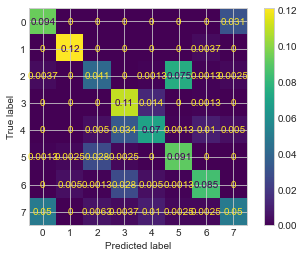

In [38]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_pred, normalize='all')
# cmd = ConfusionMatrixDisplay(cm, display_labels=['business','health'])
cmd = ConfusionMatrixDisplay(cm)
cmd.plot()
plt.savefig('cmd17.png')

In [26]:
#import classification_report
from sklearn.metrics import classification_report

In [27]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

   b'AM-DSB'       0.63      0.75      0.68       100
   b'AM-SSB'       0.94      0.97      0.96       100
     b'BPSK'       0.51      0.33      0.40       100
    b'CPFSK'       0.62      0.88      0.73       100
     b'GFSK'       0.70      0.56      0.62       100
     b'PAM4'       0.53      0.73      0.62       100
     b'QPSK'       0.82      0.68      0.74       100
     b'WBFM'       0.56      0.40      0.47       100

    accuracy                           0.66       800
   macro avg       0.66      0.66      0.65       800
weighted avg       0.66      0.66      0.65       800



In [13]:
SNR1= Features[15000:16000]
SNR2=Features[35000:36000]
SNR3=Features[55000:56000]
SNR4=Features[75000:76000]
SNR5=Features[95000:96000]
SNR6=Features[115000:116000]
SNR7=Features[135000:136000]
SNR8=Features[155000:156000]
#SNR9=Features[175000:176000]
#SNR10=Features[195000:196000]
#SNR11=Features[215000:216000]
SNR=np.concatenate((SNR1,SNR2,SNR3,SNR4,SNR5,SNR6,SNR7,SNR8),axis=0)

In [14]:
lbl1= s[15000:16000]
lbl2=s[35000:36000]
lbl3=s[55000:56000]
lbl4=s[75000:76000]
lbl5=s[95000:96000]
lbl6=s[115000:116000]
lbl7=s[135000:136000]
lbl8=s[155000:156000]
#lbl9=lbl[175000:176000]
#lbl10=lbl[195000:196000]
#lbl11=lbl[215000:216000]
lbl=np.concatenate((lbl1,lbl2,lbl3,lbl4,lbl5,lbl6,lbl7,lbl8),axis=0)

In [15]:
from sklearn.model_selection import train_test_split

#split dataset into train and test data
X_train_, X_test_, y_train_, y_test_ = train_test_split(SNR, lbl, test_size=0.5, random_state=1, stratify=lbl)

In [16]:
# sklearn.model_selection import train_test_split

#split dataset into train and test data
X_train, X_test, y_train, y_test = train_test_split(X_train_, y_train_, test_size=0.4)

In [17]:
from sklearn.model_selection import GridSearchCV
from sklearn import svm
from sklearn.svm import SVC 

clf = svm.SVC(kernel='poly',gamma=1 , C=10)

#fit model to data
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

In [18]:
#Get accuracy. Note: In case of classification algorithms score method represents accuracy.
score = clf.score(X_test, y_test)

In [19]:
score

0.774375

In [20]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

# Model Accuracy: how often is the classifier correct?
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.774375


In [21]:
# Model Precision: what percentage of positive tuples are labeled as such?
print("Precision:", metrics.precision_score(y_test, y_pred, pos_label='positive',average='macro')) 
           

# Model Recall: what percentage of positive tuples are labelled as such?
print("Recall:", metrics.recall_score(y_test, y_pred,pos_label='positive',average='macro'))

Precision: 0.7804413087342192
Recall: 0.7750136253785597


C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1267: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'macro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn("Note that pos_label (set to %r) is ignored when "


In [22]:
SNR1= Features[16000:17000]
SNR2=Features[36000:37000]
SNR3=Features[56000:57000]
SNR4=Features[76000:77000]
SNR5=Features[96000:97000]
SNR6=Features[116000:117000]
SNR7=Features[136000:137000]
SNR8=Features[156000:157000]
#SNR9=Features[176000:177000]
#SNR10=Features[196000:197000]
#SNR11=Features[216000:217000]
SNR=np.concatenate((SNR1,SNR2,SNR3,SNR4,SNR5,SNR6,SNR7,SNR8),axis=0)

In [23]:
lbl1=s[16000:17000]
lbl2=s[36000:37000]
lbl3=s[56000:57000]
lbl4=s[76000:77000]
lbl5=s[96000:97000]
lbl6=s[116000:117000]
lbl7=s[136000:137000]
lbl8=s[156000:157000]
#lbl9=lbl[176000:177000]
#lbl10=lbl[196000:197000]
#lbl11=lbl[216000:217000]
lbl=np.concatenate((lbl1,lbl2,lbl3,lbl4,lbl5,lbl6,lbl7,lbl8),axis=0)

In [24]:
from sklearn.model_selection import train_test_split

#split dataset into train and test data
X_train_, X_test_, y_train_, y_test_ = train_test_split(SNR, lbl, test_size=0.5, random_state=1, stratify=lbl)

In [25]:
# sklearn.model_selection import train_test_split

#split dataset into train and test data
X_train, X_test, y_train, y_test = train_test_split(X_train_, y_train_, test_size=0.4)

In [26]:
from sklearn.model_selection import GridSearchCV
from sklearn import svm
from sklearn.svm import SVC 

clf = svm.SVC(kernel='poly',gamma=1 , C=10)

#fit model to data
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

In [27]:
#Get accuracy. Note: In case of classification algorithms score method represents accuracy.
score = clf.score(X_test, y_test)

In [28]:
score

0.776875

In [29]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

# Model Accuracy: how often is the classifier correct?
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.776875


In [30]:
# Model Precision: what percentage of positive tuples are labeled as such?
print("Precision:", metrics.precision_score(y_test, y_pred, pos_label='positive',average='macro')) 
           

# Model Recall: what percentage of positive tuples are labelled as such?
print("Recall:", metrics.recall_score(y_test, y_pred,pos_label='positive',average='macro'))

Precision: 0.7810017394433796
Recall: 0.7794070480653127


C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1267: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'macro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn("Note that pos_label (set to %r) is ignored when "


In [12]:
SNR1= Features[17000:18000]
SNR2=Features[37000:38000]
SNR3=Features[57000:58000]
SNR4=Features[77000:78000]
SNR5=Features[97000:98000]
SNR6=Features[117000:118000]
SNR7=Features[137000:138000]
SNR8=Features[157000:158000]
#SNR9=Features[177000:178000]
#SNR10=Features[197000:198000]
#SNR11=Features[217000:218000]
SNR=np.concatenate((SNR1,SNR2,SNR3,SNR4,SNR5,SNR6,SNR7,SNR8),axis=0)

In [13]:
lbl1= s[17000:18000]
lbl2=s[37000:38000]
lbl3=s[57000:58000]
lbl4=s[77000:78000]
lbl5=s[97000:98000]
lbl6=s[117000:118000]
lbl7=s[137000:138000]
lbl8=s[157000:158000]
#lbl9=lbl[177000:178000]
#lbl10=lbl[197000:198000]
#lbl11=lbl[217000:218000]
lbl=np.concatenate((lbl1,lbl2,lbl3,lbl4,lbl5,lbl6,lbl7,lbl8),axis=0)

In [14]:
from sklearn.model_selection import train_test_split

#split dataset into train and test data
X_train_, X_test_, y_train_, y_test_ = train_test_split(SNR, lbl, test_size=0.5, random_state=1, stratify=lbl)

In [15]:
# sklearn.model_selection import train_test_split

#split dataset into train and test data
X_train, X_test, y_train, y_test = train_test_split(X_train_, y_train_, test_size=0.4)

In [16]:
from sklearn.model_selection import GridSearchCV
from sklearn import svm
from sklearn.svm import SVC 

clf = svm.SVC(kernel='poly',gamma=1 , C=10)

#fit model to data
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

In [17]:
#Get accuracy. Note: In case of classification algorithms score method represents accuracy.
score = clf.score(X_test, y_test)

In [18]:
score

0.789375

In [19]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

# Model Accuracy: how often is the classifier correct?
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.789375


In [20]:
# Model Precision: what percentage of positive tuples are labeled as such?
print("Precision:", metrics.precision_score(y_test, y_pred, pos_label='positive',average='macro')) 
           

# Model Recall: what percentage of positive tuples are labelled as such?
print("Recall:", metrics.recall_score(y_test, y_pred,pos_label='positive',average='macro'))

Precision: 0.7911115347665256
Recall: 0.7890424050427822


C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1267: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'macro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn("Note that pos_label (set to %r) is ignored when "


In [21]:
SNR1= Features[18000:19000]
SNR2=Features[38000:39000]
SNR3=Features[58000:59000]
SNR4=Features[78000:79000]
SNR5=Features[98000:99000]
SNR6=Features[118000:119000]
SNR7=Features[138000:139000]
SNR8=Features[158000:159000]
#SNR9=Features[178000:179000]
#SNR10=Features[198000:199000]
#SNR11=Features[218000:219000]
SNR=np.concatenate((SNR1,SNR2,SNR3,SNR4,SNR5,SNR6,SNR7,SNR8),axis=0)

In [22]:
lbl1= s[18000:19000]
lbl2=s[38000:39000]
lbl3=s[58000:59000]
lbl4=s[78000:79000]
lbl5=s[98000:99000]
lbl6=s[118000:119000]
lbl7=s[138000:139000]
lbl8=s[158000:159000]
#lbl9=lbl[178000:179000]
#lbl10=lbl[198000:199000]
#lbl11=lbl[218000:219000]
lbl=np.concatenate((lbl1,lbl2,lbl3,lbl4,lbl5,lbl6,lbl7,lbl8),axis=0)

In [23]:
from sklearn.model_selection import train_test_split

#split dataset into train and test data
X_train_, X_test_, y_train_, y_test_ = train_test_split(SNR, lbl, test_size=0.5, random_state=1, stratify=lbl)

In [24]:
# sklearn.model_selection import train_test_split

#split dataset into train and test data
X_train, X_test, y_train, y_test = train_test_split(X_train_, y_train_, test_size=0.4)

In [25]:
from sklearn.model_selection import GridSearchCV
from sklearn import svm
from sklearn.svm import SVC 

clf = svm.SVC(kernel='poly',gamma=1 , C=10)

#fit model to data
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

In [26]:
#Get accuracy. Note: In case of classification algorithms score method represents accuracy.
score = clf.score(X_test, y_test)

In [27]:
score

0.785625

In [28]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

# Model Accuracy: how often is the classifier correct?
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.785625


In [29]:
# Model Precision: what percentage of positive tuples are labeled as such?
print("Precision:", metrics.precision_score(y_test, y_pred, pos_label='positive',average='macro')) 
           

# Model Recall: what percentage of positive tuples are labelled as such?
print("Recall:", metrics.recall_score(y_test, y_pred,pos_label='positive',average='macro'))

Precision: 0.7898590134874882
Recall: 0.786551520556691


C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1267: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'macro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn("Note that pos_label (set to %r) is ignored when "


In [30]:
SNR1= Features[19000:20000]
SNR2=Features[39000:40000]
SNR3=Features[59000:60000]
SNR4=Features[79000:80000]
SNR5=Features[99000:100000]
SNR6=Features[119000:120000]
SNR7=Features[139000:140000]
SNR8=Features[159000:160000]
#SNR9=Features[179000:180000]
#SNR10=Features[199000:200000]
#SNR11=Features[219000:220000]
SNR=np.concatenate((SNR1,SNR2,SNR3,SNR4,SNR5,SNR6,SNR7,SNR8),axis=0)

In [31]:
lbl1= s[19000:20000]
lbl2=s[39000:40000]
lbl3=s[59000:60000]
lbl4=s[79000:80000]
lbl5=s[99000:100000]
lbl6=s[119000:120000]
lbl7=s[139000:140000]
lbl8=s[159000:160000]
#lbl9=lbl[179000:180000]
#lbl10=lbl[199000:200000]
#lbl11=lbl[219000:220000]
lbl=np.concatenate((lbl1,lbl2,lbl3,lbl4,lbl5,lbl6,lbl7,lbl8),axis=0)

In [32]:
from sklearn.model_selection import train_test_split

#split dataset into train and test data
X_train_, X_test_, y_train_, y_test_ = train_test_split(SNR, lbl, test_size=0.5, random_state=1, stratify=lbl)

In [33]:
# sklearn.model_selection import train_test_split

#split dataset into train and test data
X_train, X_test, y_train, y_test = train_test_split(X_train_, y_train_, test_size=0.4)

In [34]:
from sklearn.model_selection import GridSearchCV
from sklearn import svm
from sklearn.svm import SVC 

clf = svm.SVC(kernel='poly',gamma=1 , C=10)

#fit model to data
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

In [35]:
#Get accuracy. Note: In case of classification algorithms score method represents accuracy.
score = clf.score(X_test, y_test)

In [36]:
score

0.77625

In [37]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

# Model Accuracy: how often is the classifier correct?
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.77625


In [38]:
# Model Precision: what percentage of positive tuples are labeled as such?
print("Precision:", metrics.precision_score(y_test, y_pred, pos_label='positive',average='macro')) 
           

# Model Recall: what percentage of positive tuples are labelled as such?
print("Recall:", metrics.recall_score(y_test, y_pred,pos_label='positive',average='macro'))

Precision: 0.7931746842414253
Recall: 0.7875940695648909


C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1267: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'macro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn("Note that pos_label (set to %r) is ignored when "


In [39]:
#import confusion_matrix
from sklearn.metrics import confusion_matrix

In [40]:
#let us get the predictions using the classifier we had fit above
y_pred = clf.predict(X_test)

In [41]:
confusion_matrix(y_test, y_pred)

array([[176,   0,   2,   0,   1,   0,   0,   2],
       [  0, 214,   0,   0,   0,   0,   0,   0],
       [  0,   2, 166,   0,   6,  12,   2,   1],
       [  0,   0,   0, 175,  29,   0,   0,   0],
       [  0,   0,   4,  55, 128,   0,   0,   9],
       [  0,   0,  27,   0,   0, 162,   1,   1],
       [  0,   6,   5,   5,   0,   0, 182,   0],
       [140,   0,   2,   8,  38,   0,   0,  39]], dtype=int64)

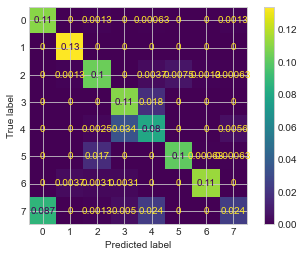

In [42]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_pred, normalize='all')
# cmd = ConfusionMatrixDisplay(cm, display_labels=['business','health'])
cmd = ConfusionMatrixDisplay(cm)
cmd.plot()
plt.savefig('cl11.png')

In [44]:
#import classification_report
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

   b'AM-DSB'       0.56      0.97      0.71       181
   b'AM-SSB'       0.96      1.00      0.98       214
     b'BPSK'       0.81      0.88      0.84       189
    b'CPFSK'       0.72      0.86      0.78       204
     b'GFSK'       0.63      0.65      0.64       196
     b'PAM4'       0.93      0.85      0.89       191
     b'QPSK'       0.98      0.92      0.95       198
     b'WBFM'       0.75      0.17      0.28       227

    accuracy                           0.78      1600
   macro avg       0.79      0.79      0.76      1600
weighted avg       0.80      0.78      0.75      1600



In [45]:
import pandas as pd
data = [[-20,100,12.7], [-18,1,12.3],[-16,100,11.8],[-14,100,12.3],[-12,1,12.8],[-10,100,13.3],[-8,100,17.7],[-6,100,23.3],[-4,100,30.1],[-2,100,39.7],[0,100,49.5],[2,100,59.5],[4,100,63.6],[6,100,67.7],[8,100,66.2],[10,10,77.4],[12,10,77.6],[14,10,78.9],[16,10,78.5],[18,10,77.6]]
pd.DataFrame(data, columns=["SNR","c" ,"Accuracy"])

,SNR,c,Accuracy
0,-20,100,12.7
1,-18,1,12.3
2,-16,100,11.8
3,-14,100,12.3
4,-12,1,12.8
5,-10,100,13.3
6,-8,100,17.7
7,-6,100,23.3
8,-4,100,30.1
9,-2,100,39.7


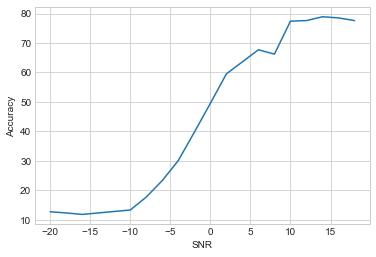

In [46]:
Accuracy = [12.7,12.3,11.8,12.3,12.8,13.3,17.7,23.3,30.1,39.7,49.5,59.5,63.6,67.7,66.2,77.4,77.6,78.9,78.5,77.6]
SNR = [-20,-18,-16,-14,-12,-10,-8,-6,-4,-2,0,2,4,6,8,10,12,14,16,18]

plt.plot(SNR,Accuracy)
plt.xlabel('SNR')
plt.ylabel('Accuracy')
plt.savefig('15.png')

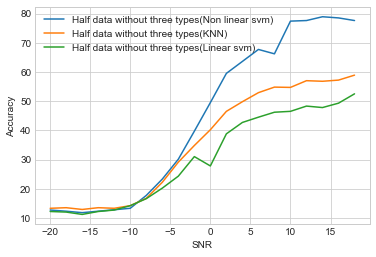

In [2]:
Accuracy1 = [12.2,12,11.2,12.2,12.7,14.2,16.6,20.2,24.3,31,27.8,38.8,42.7,44.5,46.2,46.5,48.3,47.8,49.3,52.5]
SNR1 = [-20,-18,-16,-14,-12,-10,-8,-6,-4,-2,0,2,4,6,8,10,12,14,16,18]
Accuracy = [13.3,13.5,12.9,13.5,13.3,14.2,16.7,22.2,29.1,34.8,40.2,46.5,49.8,52.9,54.8,54.7,57,56.8,57.2,58.9]
SNR= [-20,-18,-16,-14,-12,-10,-8,-6,-4,-2,0,2,4,6,8,10,12,14,16,18]
Accuracy2 = [12.7,12.3,11.8,12.3,12.8,13.3,17.7,23.3,30.1,39.7,49.5,59.5,63.6,67.7,66.2,77.4,77.6,78.9,78.5,77.6]
SNR2 = [-20,-18,-16,-14,-12,-10,-8,-6,-4,-2,0,2,4,6,8,10,12,14,16,18]


plt.plot(SNR2,Accuracy2,label='Half data without three types(Non linear svm)')
plt.plot(SNR,Accuracy,label='Half data without three types(KNN)')
plt.plot(SNR1,Accuracy1,label='Half data without three types(Linear svm)')

plt.legend()
plt.xlabel('SNR')
plt.ylabel('Accuracy')
plt.savefig('1KSSN.png')

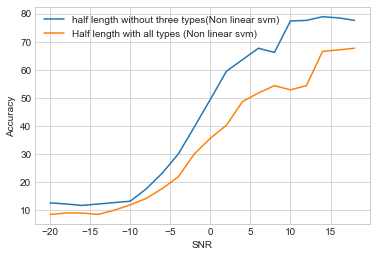

In [2]:
Accuracy2 = [12.7,12.3,11.8,12.3,12.8,13.3,17.7,23.3,30.1,39.7,49.5,59.5,63.6,67.7,66.2,77.4,77.6,78.9,78.5,77.6]
SNR2 = [-20,-18,-16,-14,-12,-10,-8,-6,-4,-2,0,2,4,6,8,10,12,14,16,18]
Accuracy = [8.6,9.1,9.1,8.6,10.1,12,14.3,17.8,22,30.1,35.7,40.3,48.7,51.8,54.4,52.9,54.4,66.6,67.1,67.7]
SNR = [-20,-18,-16,-14,-12,-10,-8,-6,-4,-2,0,2,4,6,8,10,12,14,16,18]

plt.plot(SNR2,Accuracy2,label='half length without three types(Non linear svm)')
plt.plot(SNR,Accuracy,label='Half length with all types (Non linear svm)')

plt.legend()
plt.xlabel('SNR')
plt.ylabel('Accuracy')
plt.savefig('21.png')


Text(0, 0.5, 'Accuracy')

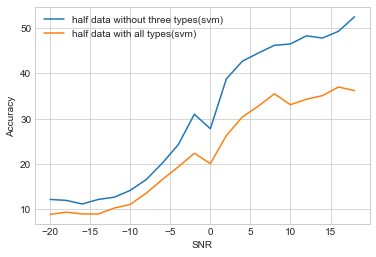

In [35]:
Accuracy1 = [12.2,12,11.2,12.2,12.7,14.2,16.6,20.2,24.3,31,27.8,38.8,42.7,44.5,46.2,46.5,48.3,47.8,49.3,52.5]
SNR1 = [-20,-18,-16,-14,-12,-10,-8,-6,-4,-2,0,2,4,6,8,10,12,14,16,18]
Accuracy = [8.9,9.4,9,9,10.3,11.1,13.6,16.6,19.4,22.4,20.1,26.3,30.4,32.8,35.5,33.1,34.3,35.1,37,36.2]
SNR= [-20,-18,-16,-14,-12,-10,-8,-6,-4,-2,0,2,4,6,8,10,12,14,16,18]




plt.plot(SNR1,Accuracy1,label='half data without three types(svm)')
plt.plot(SNR,Accuracy,label='half data with all types(svm)')
plt.legend()
plt.xlabel('SNR')
plt.ylabel('Accuracy')

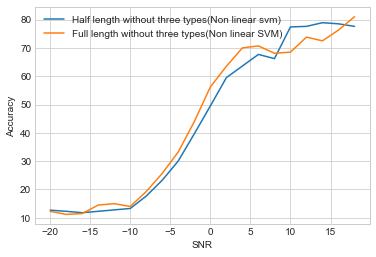

In [3]:
Accuracy2 = [12.7,12.3,11.8,12.3,12.8,13.3,17.7,23.3,30.1,39.7,49.5,59.5,63.6,67.7,66.2,77.4,77.6,78.9,78.5,77.6]
SNR2 = [-20,-18,-16,-14,-12,-10,-8,-6,-4,-2,0,2,4,6,8,10,12,14,16,18]
Accuracy = [12.3,11.2,11.5,14.5,15,14,19.3,25.7,33.3,44,56.2,63.5,70,70.7,68.1,68.5,73.8,72.5,76.3,81]
SNR = [-20,-18,-16,-14,-12,-10,-8,-6,-4,-2,0,2,4,6,8,10,12,14,16,18]


plt.plot(SNR2,Accuracy2,label='Half length without three types(Non linear svm)')
plt.plot(SNR,Accuracy,label='Full length without three types(Non linear SVM)')
plt.legend()
plt.xlabel('SNR')
plt.ylabel('Accuracy')
plt.savefig('1SN.png')
